In [ ]:
#https://www.youtube.com/watch?v=QIUxPv5PJOY
#LSTM program (Long Short Term Memory)

In [3]:
import math
import pandas_datareader as web
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use("fivethirtyeight")

In [7]:
#get the stock quote 
df = web.DataReader('AAPL', data_source= 'yahoo', start= "2015-01-01", end = "2020-12-31")
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,27.860001,26.837500,27.847500,27.332500,212818400.0,24.861401
2015-01-05,27.162500,26.352501,27.072500,26.562500,257142000.0,24.161013
2015-01-06,26.857500,26.157499,26.635000,26.565001,263188400.0,24.163294
2015-01-07,27.049999,26.674999,26.799999,26.937500,160423600.0,24.502111
2015-01-08,28.037500,27.174999,27.307501,27.972500,237458000.0,25.443539
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [5]:
#get the number of colums and rows in the dataset
df.shape


(1259, 6)

Text(0, 0.5, 'Closing price USD ($)')

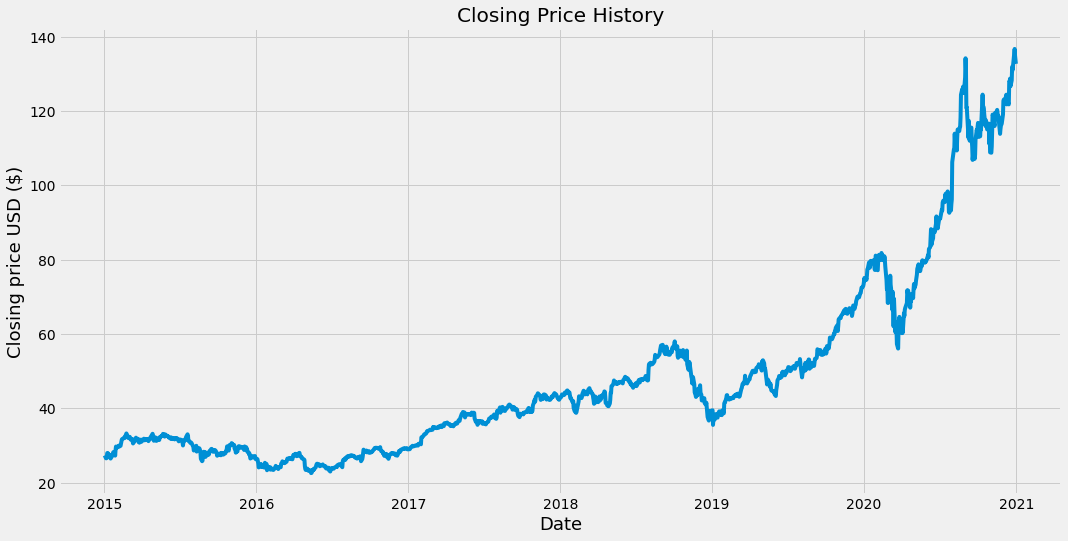

In [8]:
#vizualize the closing price history
plt.figure(figsize=(16, 8))
plt.title("Closing Price History")
plt.plot(df["Close"])
plt.xlabel("Date", fontsize = 18)
plt.ylabel("Closing price USD ($)", fontsize = 18)

In [13]:
#create new dataframe with only closing price
data = df.filter(['Close'])
#convert the dataframe to a numpy frame
dataset = data.values
#get the number of rows to the model on (80% data, roundup)
training_data_len = math.ceil(len(dataset) * .8)

training_data_len



1209

In [14]:
#scale the data - minum and maximum 
#https://kharshit.github.io/blog/2018/03/23/scaling-vs-normalization#:~:text=5%20mins%20read,while%20using%20machine%20learning%20algorithms.
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.04160643],
       [0.03485825],
       [0.03488017],
       ...,
       [0.98404971],
       [0.97397133],
       [0.96494457]])

In [19]:
#create the training data set
#create the scale training data set
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0]) #60 values position 0 to 60
    y_train.append(train_data[i, 0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([0.04160643, 0.03485825, 0.03488017, 0.0381447 , 0.04721529,
       0.04747821, 0.04143114, 0.04355638, 0.04263618, 0.0361071 ,
       0.0342886 , 0.04026994, 0.04208844, 0.04833269, 0.04960345,
       0.04986635, 0.04119014, 0.05470838, 0.06257395, 0.05876168,
       0.06198238, 0.06202621, 0.06401998, 0.06485256, 0.06263968,
       0.06437054, 0.06940975, 0.07567591, 0.07913764, 0.08049604,
       0.08213927, 0.08408922, 0.08349765, 0.08579817, 0.09346655,
       0.09164804, 0.08424257, 0.08781386, 0.08351959, 0.08489987,
       0.08549144, 0.08369483, 0.0790281 , 0.07944437, 0.0806275 ,
       0.07486527, 0.06989177, 0.0747338 , 0.07284957, 0.07582928,
       0.0804084 , 0.08354148, 0.08141625, 0.07791071, 0.08078086,
       0.07964157, 0.07238947, 0.0742737 , 0.07210465, 0.07894046])]
[0.0746899850233729]

[array([0.04160643, 0.03485825, 0.03488017, 0.0381447 , 0.04721529,
       0.04747821, 0.04143114, 0.04355638, 0.04263618, 0.0361071 ,
       0.0342886 , 0.04026994, 0.042

In [20]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#20:01 minutes